## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [2]:
dataset = pd.read_csv('Salary Data Set.csv')

In [4]:
print(dataset)

                Position  Grade   Salary
0          New Associate      1    17000
1              Associate      2    27000
2                Analyst      3    40000
3         Senior Analyst      4    65000
4              Team Lead      5   100000
5      Associate Manager      6   150000
6                Manager      7   250000
7         Senior Manager      8   400000
8             Leadership      9   650000
9      Senior Leadership     10  1000000
10     Global Leadership     12  1800000
11  Executive Leadership     13  4000000


In [3]:
#identifing dependent and independent variable 
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [6]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


## Feature Scaling

In [7]:
y = y.reshape(len(y),1)

In [8]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


## Training The SVR Model

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

x = sc_X.fit_transform(X)
Y = sc_y.fit_transform(y)

In [25]:
print(x)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [11]:
print(Y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,Y)

C:\Users\PRATUSHA PANDEY\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting New Result

In [26]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[298252.57347613]])

## Visualising SVR Results

Text(0, 0.5, 'Salary')

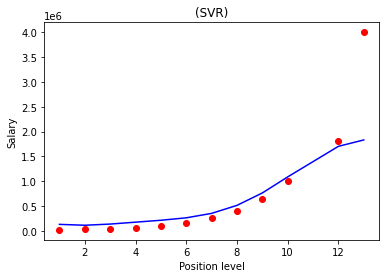

In [29]:
plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')